# S&P 500 Monthly Returns Analysis

## Overview
This notebook examines monthly returns for the S&P 500 over more than two centuries. It highlights seasonal behavior, monthly statistics, and the best/worst months historically.

---

## Objectives
1. Assess seasonal patterns by month across the entire dataset.
2. Summarize descriptive statistics for each calendar month.
3. Evaluate risk-return characteristics such as volatility and Sharpe-style ratios.
4. Provide historical context that links observed patterns to broader market regimes.

---

## Dataset
- Source: S&P 500 historical price file (`01_data/S&P500_D_1789-05-01_2025-11-06.csv`).
- Frequency: daily data resampled to month-end observations.
- Returns: simple month-over-month percentage changes.
- Sample: ~2,800 monthly observations spanning 1789–2025.

---

## Methodology
- Resample to each month’s last business day and compute returns as `(Price_t / Price_t-1) - 1`.
- Maintain all data, preserving crisis periods and long-term regimes.
- Track sample sizes per month to ensure even coverage and validity.

---

## Research Questions
1. Which months have historically delivered the highest and lowest average returns?
2. How do volatility and extremes differ across calendar months?
3. Are there persistent seasonal anomalies over time?
4. Do observed patterns hold across different historical eras?

---

## Expected Insights
- November, December, and January often show the largest average gains.
- September and May tend to be weaker months, with October frequently volatile.
- July and August historically exhibit lower volatility and more stability.
- Consistency metrics (e.g., % positive months) complement average-return rankings.

---

## Applications
- Tactical monthly rotations and risk-aware positioning.
- Academic analysis of calendar anomalies and seasonality.
- Benchmarking fund performance against long-term seasonal norms.

---

## Notebook Structure
1. Load and clean the raw data.
2. Compute month-end values and returns.
3. Calculate descriptive statistics and risk metrics by month.
4. Rank months by performance and volatility.
5. Visualize seasonal patterns and summarize findings.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "^spx_d.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "^spx_d.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "^spx_d.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [2]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [3]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


In [4]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

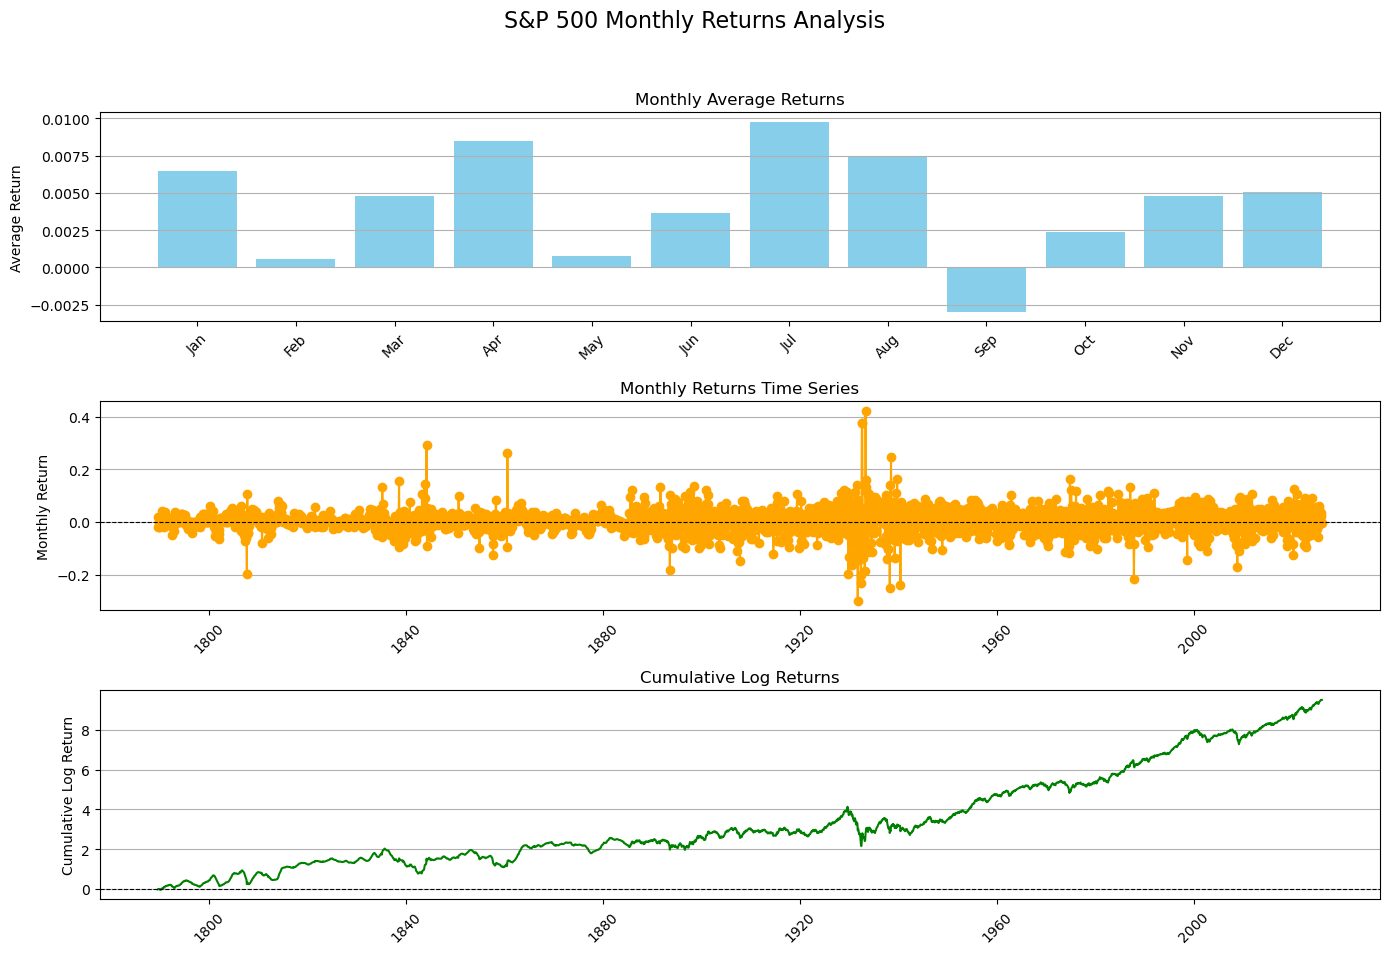

In [5]:
# group by month and calculate mean returns for each month
monthly_avg_returns = monthly_ohlcv['monthly_returns'].groupby(monthly_ohlcv.index.month).mean()
monthly_avg_returns.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting
plt.figure(figsize=(14, 10))
plt.suptitle('S&P 500 Monthly Returns Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.4)
# Subplot 1: Monthly Average Returns
plt.subplot(3, 1, 1)
plt.bar(monthly_avg_returns.index, monthly_avg_returns.values, color='skyblue')
plt.title('Monthly Average Returns')
plt.ylabel('Average Return')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Subplot 2: Monthly Returns Time Series
plt.subplot(3, 1, 2)
plt.plot(monthly_ohlcv['monthly_returns'], marker='o', linestyle='-', color='orange')
plt.title('Monthly Returns Time Series')
plt.ylabel('Monthly Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Subplot 3: Cumulative Log Returns
plt.subplot(3, 1, 3)
plt.plot(cumsum_log, color='green')
plt.title('Cumulative Log Returns')
plt.ylabel('Cumulative Log Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
# Statistical Summary
mean_return = monthly_ohlcv['monthly_returns'].mean()
median_return = monthly_ohlcv['monthly_returns'].median()
std_dev_return = monthly_ohlcv['monthly_returns'].std()
max_return = monthly_ohlcv['monthly_returns'].max()
min_return = monthly_ohlcv['monthly_returns'].min()

print("Statistical Summary of Monthly Returns:")
print(f"Mean Return: {mean_return:.4f}")
print(f"Median Return: {median_return:.4f}")
print(f"Standard Deviation: {std_dev_return:.4f}")
print(f"Max Return: {max_return:.4f}")
print(f"Min Return: {min_return:.4f}")

# print statistical summary using describe
print("\nDetailed Statistical Summary:")
print(monthly_ohlcv['monthly_returns'].describe())

Statistical Summary of Monthly Returns:
Mean Return: 0.0043
Median Return: 0.0041
Standard Deviation: 0.0431
Max Return: 0.4222
Min Return: -0.2994

Detailed Statistical Summary:
count    2834.000000
mean        0.004283
std         0.043084
min        -0.299423
25%        -0.015034
50%         0.004081
75%         0.025254
max         0.422222
Name: monthly_returns, dtype: float64
